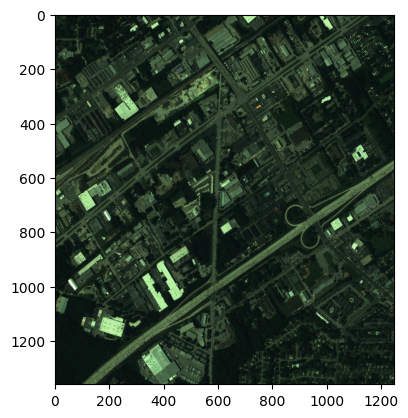

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


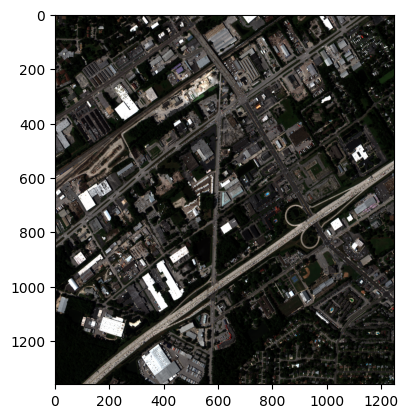

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


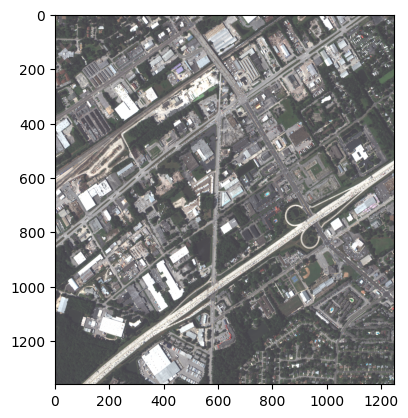

In [1]:
# Python中可视化多波段卫星影像
#！/usr/bin/env python3
# -*- coding:utf-8 -*-

%matplotlib inline


from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
"""1.归一化值显示函数"""
def scaleMinMax(x):
    return((x - np.nanmin(x))/(np.nanmax(x) - np.nanmin(x)))
"""2.2%线性拉伸显示函数"""
def scaleCCC(x):
    return((x - np.nanpercentile(x, 2))/(np.nanpercentile(x, 98) - np.nanpercentile(x,2)))
"""3.标准差值显示函数"""
def scaleStd(x):
    return((x - (np.nanmean(x)-np.nanstd(x)*2))/((np.nanmean(x)+np.nanstd(x)*2) - (np.nanmean(x)-np.nanstd(x)*2)))
#==========================（1）读取多光谱影像========================
ds = gdal.Open(r"D:\GoogleDownLoads\CasMVSNet_pl\gdal_study\RSP_testing_data\JAX_IMG1_MSI.TIF")  # gdal.Dataset

#==========================（2）读取出对应rgb的对应波段================
r = ds.GetRasterBand(1).ReadAsArray()
g = ds.GetRasterBand(2).ReadAsArray()
b = ds.GetRasterBand(3).ReadAsArray()

ds = None
#==========================（3）归一化值处理并显示=====================
rMinMax = scaleMinMax(r)
gMinMax = scaleMinMax(g)
bMinMax = scaleMinMax(b)

rgbMinMax = np.dstack((rMinMax,gMinMax,bMinMax))
plt.figure()
plt.imshow(rgbMinMax)
plt.show()
#==========================（4）2%线性拉伸处理并显示===================
rCCC = scaleCCC(r)
gCCC = scaleCCC(g)
bCCC = scaleCCC(b)

rgbCCC = np.dstack((rCCC,gCCC,bCCC))
plt.figure()
plt.imshow(rgbCCC)
plt.show()

rStd = scaleStd(r)
gStd = scaleStd(g)
bStd = scaleStd(b)
#==========================（5）标准差值处理并显示=====================
rgbStd = np.dstack((rStd,gStd,bStd))
plt.figure()
plt.imshow(rgbStd)
plt.show()
